In [3]:
import pandas as pd
from jupyterthemes import jtplot
%pylab inline
jtplot.style()

Populating the interactive namespace from numpy and matplotlib


In [57]:
metric = pd.read_csv('NewProxy.csv').drop(columns=['Unnamed: 0'])

In [ ]:
metric = metric.sort_values(by='Edge_Asymmetry', ascending=False)
metric.head()

# Prepping for visualization

In [73]:
vis_fmt = {}
for i, row in metric.iterrows():
    countryA =  row['country_code_alpha3_X']
    countryB =  row['country_code_alpha3_Y']
    key = '{}->{}'.format(countryA, countryB)
    sim =  row['Edge_Asymmetry']
    vis_fmt[key] = {
        'Overall_Similarity': 1-sim-0.00001 # HACK - viz breaks when values are 1
    }

In [52]:
import json
with open('metric.json', 'w') as f:
    f.write(json.dumps(vis_fmt))

# Looking at the data on a per-country basis

In [38]:
per_country = metric.groupby('country_code_alpha2_X').mean()
per_country

,X2Y_Similarity,Y2X_Similarity,Edge_Asymmetry,Average_Similarity
country_code_alpha2_X,,,,
AD,1.000000,1.000000,0.000000,1.000000
AT,1.000000,1.000000,0.000000,1.000000
AU,0.976250,0.933333,0.055417,0.954792
BE,0.983750,0.987500,0.018750,0.985625
BG,0.982800,0.994400,0.018000,0.988600
BR,0.983333,0.986667,0.023333,0.985000
BZ,1.000000,0.999184,0.000816,0.999592
CA,0.988000,0.999000,0.011000,0.993500
CL,0.985333,0.980667,0.022000,0.983000


immediate issue - blocklists may include "google.com" but not "google.ca"
both are blocked; only the former is detected.

i'd say that's ok.  it still captures an aspect of US hegemony, no?

# Y2X similarity: Who's getting blocked?

y2x similarity: other countries are trying to regulate some behavior that's popular in your country!

In [45]:
per_country.sort_values(by='Y2X_Similarity').head()

,X2Y_Similarity,Y2X_Similarity,Edge_Asymmetry,Average_Similarity
country_code_alpha2_X,,,,
KR,0.960769,0.598846,0.364231,0.779808
US,0.966667,0.752941,0.215294,0.859804
IN,0.984444,0.881481,0.108889,0.932963
RU,0.995455,0.889091,0.110000,0.942273
NL,0.976957,0.927826,0.066522,0.952391


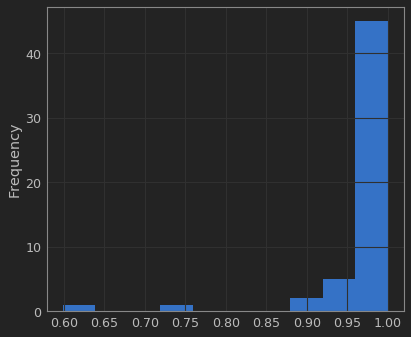

In [46]:
per_country['Y2X_Similarity'].plot.hist()

Korea, US, India, Russia are basically outliers here. Esepcially Korea! Lots of people are blocking websites that are popular in Korea. Same with the US, though to a slightly lesser extent.

Would be VERY interesting to dig into qualitatively and see what those websites are. Just try to categorize them and see what's going on.

# X2Y similarity: Who's doing the blocking?

In [47]:
per_country.sort_values(by='Y2X_Similarity').head()

,X2Y_Similarity,Y2X_Similarity,Edge_Asymmetry,Average_Similarity
country_code_alpha2_X,,,,
KR,0.960769,0.598846,0.364231,0.779808
US,0.966667,0.752941,0.215294,0.859804
IN,0.984444,0.881481,0.108889,0.932963
RU,0.995455,0.889091,0.110000,0.942273
NL,0.976957,0.927826,0.066522,0.952391


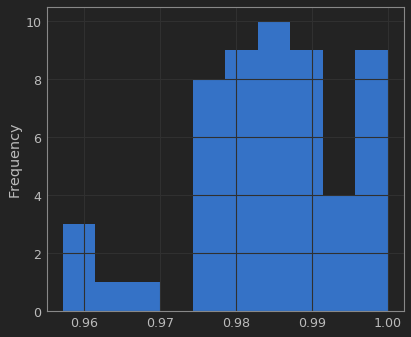

In [48]:
per_country['X2Y_Similarity'].plot.hist()

how do we interpret this really high clustering at the top? 

at face-value, it means that most people don't block stuff that's popular in any one other country. (makes me skeptical about the accuracy of our data with china...).

even so, we have a paradox: how is it that no one country is blocking a hwole lot, yet korea is getting a whole lot of popular stuff blocked?


# Global picture

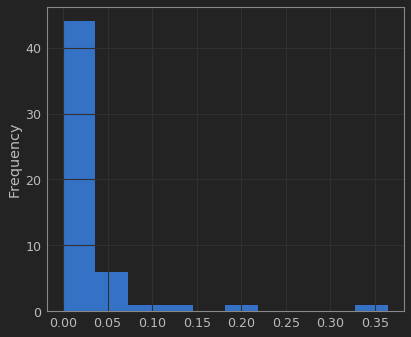

In [54]:
per_country['Edge_Asymmetry'].plot.hist()

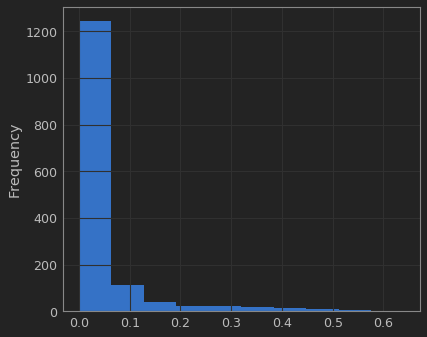

In [56]:
metric['Edge_Asymmetry'].plot.hist()

# China

In [68]:
metric[
    (metric['country_code_alpha2_X'] == 'CN') |
    (metric['country_code_alpha2_Y'] == 'CN')
].sort_values(by='Edge_Asymmetry', ascending=False).head(10)

,pair,country_code_alpha2_X,country_code_alpha2_Y,X2Y_Similarity,Y2X_Similarity,Edge_Asymmetry,Average_Similarity,country_code_alpha3_X,country_code_alpha3_Y
713,"('KR', 'CN')",KR,CN,0.92,0.36,0.56,0.64,KOR,CHN
1356,"('US', 'CN')",US,CN,0.90,0.66,0.24,0.78,USA,CHN
255,"('CN', 'IN')",CN,IN,0.76,0.92,0.16,0.84,CHN,IND
265,"('CN', 'RU')",CN,RU,0.90,1.00,0.10,0.95,CHN,RUS
914,"('NL', 'CN')",NL,CN,0.92,0.84,0.08,0.88,NLD,CHN
266,"('CN', 'SA')",CN,SA,1.00,0.92,0.08,0.96,CHN,SAU
253,"('CN', 'GR')",CN,GR,1.00,0.94,0.06,0.97,CHN,GRC
271,"('CN', 'VE')",CN,VE,1.00,0.94,0.06,0.97,CHN,VEN
269,"('CN', 'TR')",CN,TR,0.98,0.92,0.06,0.95,CHN,TUR
268,"('CN', 'SG')",CN,SG,0.98,0.92,0.06,0.95,CHN,SGP


Against china, US and India really stand out.

# US

In [70]:
metric[
    (metric['country_code_alpha2_X'] == 'US') |
    (metric['country_code_alpha2_Y'] == 'US')
].sort_values(by='Edge_Asymmetry', ascending=False).head(10)

,pair,country_code_alpha2_X,country_code_alpha2_Y,X2Y_Similarity,Y2X_Similarity,Edge_Asymmetry,Average_Similarity,country_code_alpha3_X,country_code_alpha3_Y
752,"('KR', 'US')",KR,US,0.66,0.12,0.54,0.39,KOR,USA
1350,"('US', 'BE')",US,BE,0.98,0.62,0.36,0.80,USA,BEL
1354,"('US', 'CA')",US,CA,1.00,0.64,0.36,0.82,USA,CAN
1360,"('US', 'DZ')",US,DZ,1.00,0.66,0.34,0.83,USA,DZA
1348,"('US', 'AT')",US,AT,1.00,0.66,0.34,0.83,USA,AUT
1371,"('US', 'JP')",US,JP,0.90,0.56,0.34,0.73,USA,JPN
1395,"('US', 'VE')",US,VE,1.00,0.70,0.30,0.85,USA,VEN
1391,"('US', 'SG')",US,SG,0.98,0.68,0.30,0.83,USA,SGP
1384,"('US', 'PT')",US,PT,1.00,0.70,0.30,0.85,USA,PRT
1382,"('US', 'PE')",US,PE,0.98,0.68,0.30,0.83,USA,PER


I think we get a lot of stuff here from redirects. Let's see if we can hone down a little further by seeing who's blocking US stuff (since US isn't blocking anyone else's).

In [72]:
metric[
    (metric['country_code_alpha2_X'] == 'US')
].sort_values(by='Y2X_Similarity').head(10)

,pair,country_code_alpha2_X,country_code_alpha2_Y,X2Y_Similarity,Y2X_Similarity,Edge_Asymmetry,Average_Similarity,country_code_alpha3_X,country_code_alpha3_Y
1371,"('US', 'JP')",US,JP,0.90,0.56,0.34,0.73,USA,JPN
1379,"('US', 'NL')",US,NL,0.84,0.58,0.26,0.71,USA,NLD
1350,"('US', 'BE')",US,BE,0.98,0.62,0.36,0.80,USA,BEL
1369,"('US', 'IN')",US,IN,0.72,0.64,0.08,0.68,USA,IND
1354,"('US', 'CA')",US,CA,1.00,0.64,0.36,0.82,USA,CAN
1348,"('US', 'AT')",US,AT,1.00,0.66,0.34,0.83,USA,AUT
1356,"('US', 'CN')",US,CN,0.90,0.66,0.24,0.78,USA,CHN
1360,"('US', 'DZ')",US,DZ,1.00,0.66,0.34,0.83,USA,DZA
1361,"('US', 'ES')",US,ES,0.96,0.68,0.28,0.82,USA,ESP
1382,"('US', 'PE')",US,PE,0.98,0.68,0.30,0.83,USA,PER


again, i really think this is stuff like google.com redirecting to google.co.jp. Is it blocking? No, but it is evidence of fragmentation/regionalism/nationalism. And it certainly dispells us of the notion that the US's internet is the global Internet.

# India
what accounts for its low y2x similarity? who's doing the blocking?

In [74]:
metric[
    (metric['country_code_alpha2_X'] == 'IN')
].sort_values(by='Y2X_Similarity').head(10)

,pair,country_code_alpha2_X,country_code_alpha2_Y,X2Y_Similarity,Y2X_Similarity,Edge_Asymmetry,Average_Similarity,country_code_alpha3_X,country_code_alpha3_Y
596,"('IN', 'SG')",IN,SG,0.98,0.80,0.18,0.89,IND,SGP
581,"('IN', 'DZ')",IN,DZ,1.00,0.80,0.20,0.90,IND,DZA
588,"('IN', 'MY')",IN,MY,1.00,0.82,0.18,0.91,IND,MYS
578,"('IN', 'CR')",IN,CR,1.00,0.82,0.18,0.91,IND,CRI
597,"('IN', 'TR')",IN,TR,0.94,0.82,0.12,0.88,IND,TUR
591,"('IN', 'PT')",IN,PT,1.00,0.84,0.16,0.92,IND,PRT
598,"('IN', 'TW')",IN,TW,0.96,0.84,0.12,0.90,IND,TWN
577,"('IN', 'CA')",IN,CA,1.00,0.84,0.16,0.92,IND,CAN
594,"('IN', 'SA')",IN,SA,0.98,0.84,0.14,0.91,IND,SAU
599,"('IN', 'VE')",IN,VE,0.98,0.86,0.12,0.92,IND,VEN


# Korea
what accounts for its low y2x similarity? who's doing the blocking?



In [75]:
metric[
    (metric['country_code_alpha2_X'] == 'KR')
].sort_values(by='Y2X_Similarity').head(10)

,pair,country_code_alpha2_X,country_code_alpha2_Y,X2Y_Similarity,Y2X_Similarity,Edge_Asymmetry,Average_Similarity,country_code_alpha3_X,country_code_alpha3_Y
752,"('KR', 'US')",KR,US,0.66,0.12,0.54,0.39,KOR,USA
728,"('KR', 'JP')",KR,JP,0.88,0.24,0.64,0.56,KOR,JPN
726,"('KR', 'IN')",KR,IN,0.74,0.34,0.40,0.54,KOR,IND
713,"('KR', 'CN')",KR,CN,0.92,0.36,0.56,0.64,KOR,CHN
736,"('KR', 'NL')",KR,NL,0.86,0.40,0.46,0.63,KOR,NLD
711,"('KR', 'CA')",KR,CA,0.96,0.40,0.56,0.68,KOR,CAN
722,"('KR', 'HK')",KR,HK,0.90,0.42,0.48,0.66,KOR,HKG
720,"('KR', 'FR')",KR,FR,0.94,0.42,0.52,0.68,KOR,FRA
717,"('KR', 'DZ')",KR,DZ,1.00,0.42,0.58,0.71,KOR,DZA
748,"('KR', 'SG')",KR,SG,0.98,0.44,0.54,0.71,KOR,SGP


does korea just have a really regional/local internet? or what? what's going on?